<a href="https://colab.research.google.com/github/scichemcode/TimeSeriesAnalysis/blob/main/6010_Final_Notebook_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission notebook for CHEM-6010 Task 2
#Name:- Kriti Alam

In [ ]:
!git clone --depth=1 --filter=blob:none https://github.com/valsson-group/chem6010-spring2025.git


Cloning into 'chem6010-spring2025'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 0), reused 18 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 6.05 KiB | 1.51 MiB/s, done.
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 147 (delta 117), reused 143 (delta 117), pack-reused 0 (from 0)
Receiving objects: 100% (147/147), 19.53 MiB | 7.44 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Updating files: 100% (147/147), done.


In [ ]:
cd /chem6010-spring2025/chem6010-spring2025/Datasets-5

[Errno 2] No such file or directory: '/chem6010-spring2025/chem6010-spring2025/Datasets-5'
/home/alam


/home/alam/.local/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [ ]:
!git sparse-checkout set Datasets-5/Task-2/

In [ ]:
!git checkout

Your branch is up to date with 'origin/main'.


In [ ]:
import glob as glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.chdir('chem6010-spring2025')

FileNotFoundError: [Errno 2] No such file or directory: 'chem6010-spring2025'

In [ ]:
path_task2=glob.glob('Datasets-5/Task-2/*.data')

In [ ]:
path_task2[0]

'Datasets-5/Task-2/dataset_2D-Model.9826.data'

In [ ]:
#Loading the data and extracting the variables and time
time_vals=[]
labels=[]
dataframes=[]
px=[]
py=[]
for data in path_task2:
  time_data=pd.read_csv(data,
                      delim_whitespace=True,
                      comment='#',
                      names=['Time[ns]','p.x','p.y'])
  dataframes.append(time_data)
  labels.append(data.split('/')[-1].split('.data')[0])
  px.append(time_data['p.x'].to_numpy())
  py.append(time_data['p.y'].to_numpy())
  time_vals.append(time_data['Time[ns]'].to_numpy())

Observing the time series of the px and py values

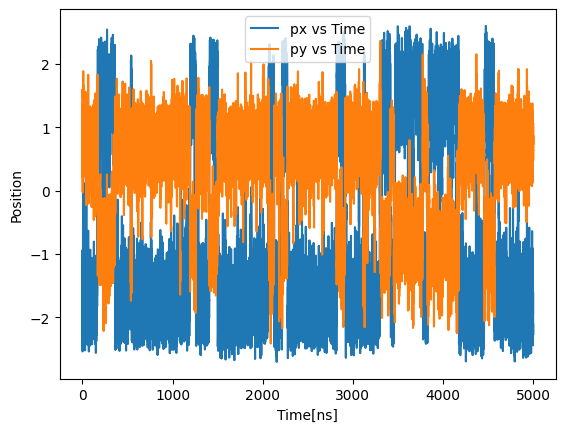

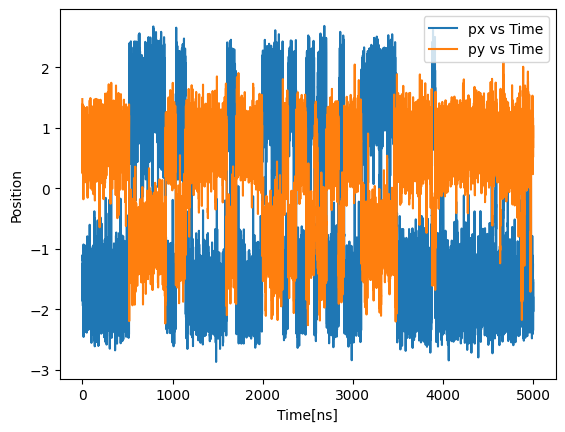

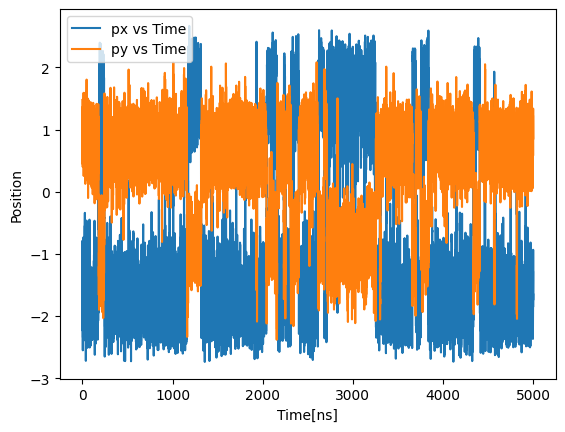

In [ ]:
for (px_vals,py_vals,time) in zip(px,py,time_vals):
  plt.plot(time,px_vals,label='px vs Time')
  plt.plot(time,py_vals,label='py vs Time')
  plt.xlabel('Time[ns]')
  plt.ylabel('Position')
  plt.legend()
  plt.show()

Kernel Density Estimation (KDE) and Histogram for p.x and p.y of each dataset

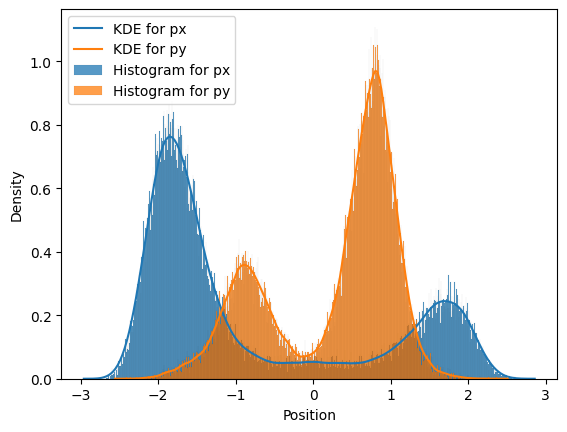

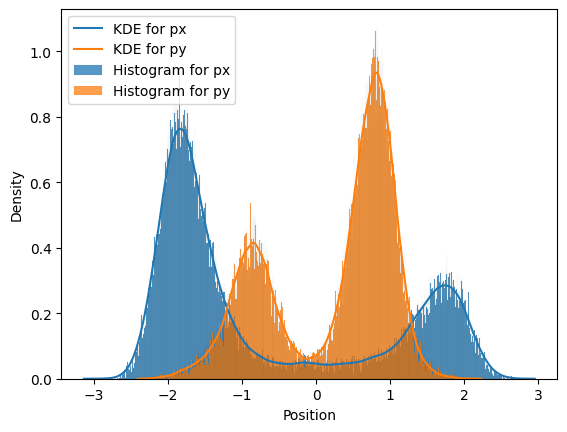

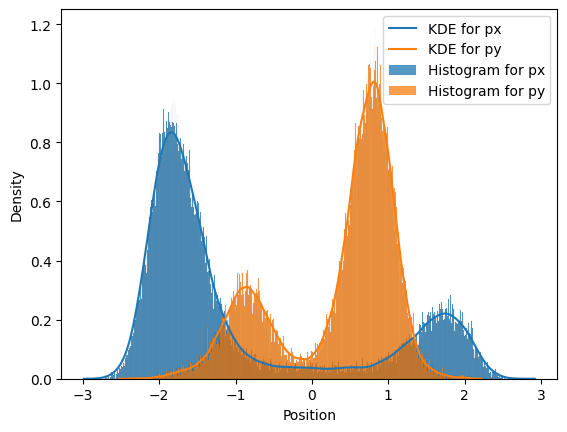

In [ ]:
for (px_vals,py_vals) in zip(px,py):
  sns.kdeplot(px_vals,label='KDE for px',bw_adjust=0.5)
  sns.kdeplot(py_vals,label='KDE for py',bw_adjust=0.5)
  sns.histplot(px_vals,label='Histogram for px',stat="density",bins=1000)
  sns.histplot(py_vals,label='Histogram for py',stat="density",bins=1000)
  plt.xlabel('Position')
  plt.ylabel('Density')
  plt.legend()
  plt.show()

KDE of the 2D distribution of the datasets along with the isolation of the metastable states using a threshold from viusal inspection.

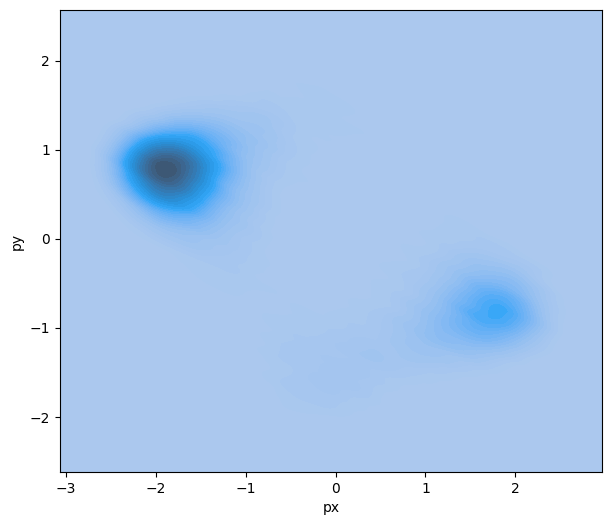

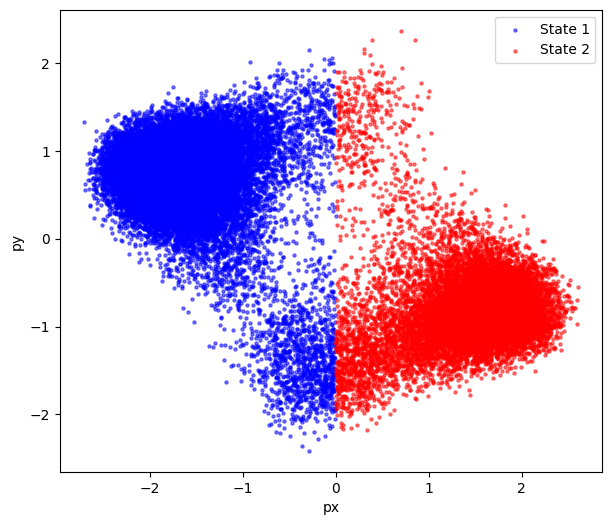

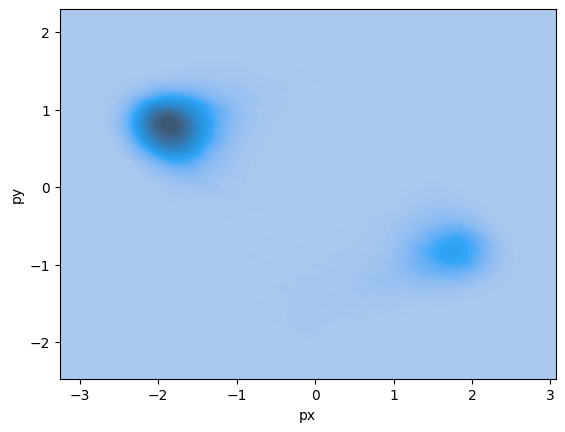

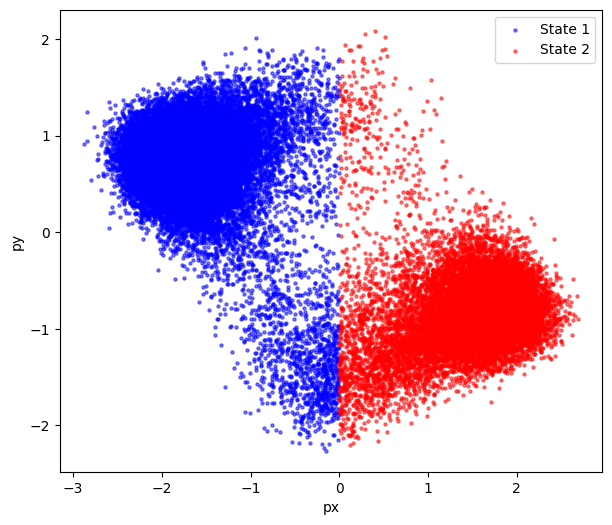

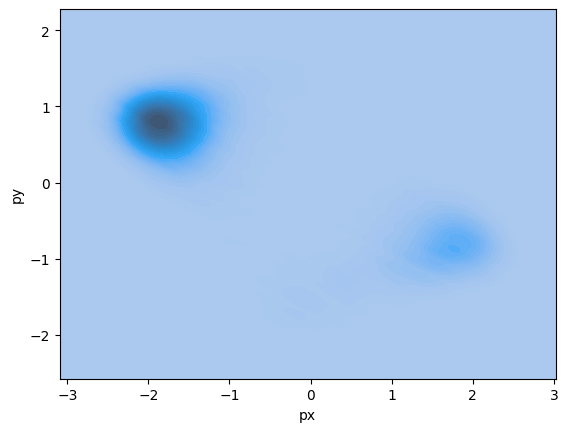

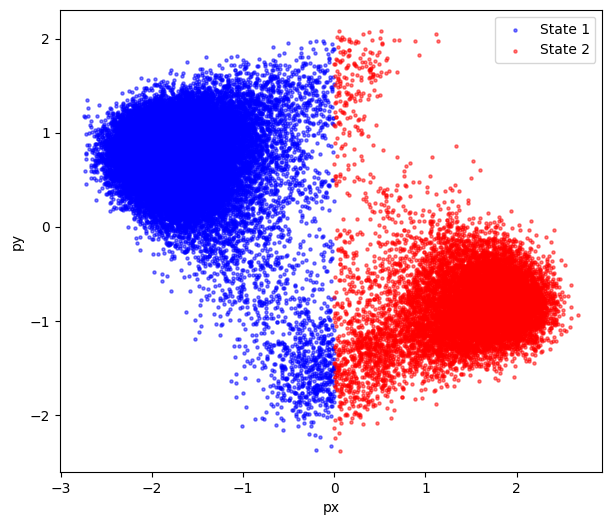

In [ ]:
plt.figure(figsize=(7, 6))

metastable_states = []

for px_vals, py_vals in zip(px, py):
    data = np.vstack([px_vals, py_vals]).T  # Combine into (N,2) array

    # Estimate density using KDE
    kde = sns.kdeplot(x=px_vals, y=py_vals, fill=True, levels=30, thresh=0, bw_adjust=0.5)

    threshold = 0

    # Split data based on the threshold in px
    state1 = data[px_vals < threshold]
    state2 = data[px_vals >= threshold]
    metastable_states.append((state1, state2))

    plt.xlabel('px')
    plt.ylabel('py')
    plt.show()

    # Scatter plot to visualize the two metastable states
    plt.figure(figsize=(7, 6))
    plt.scatter(state1[:, 0], state1[:, 1], s=5, color="blue", alpha=0.5, label="State 1")
    plt.scatter(state2[:, 0], state2[:, 1], s=5, color="red", alpha=0.5, label="State 2")
    plt.xlabel('px')
    plt.ylabel('py')
    plt.legend()
    plt.show()


In [ ]:
metastable_states[0]

(array([[-1.174     ,  1.477     ],
        [-1.30211008,  1.5982065 ],
        [-1.355643  ,  1.48242387],
        ...,
        [-2.06197948,  0.87050086],
        [-1.95658094,  0.66027985],
        [-2.11262089,  0.49015543]]),
 array([[0.17973204, 1.6048079 ],
        [0.29696796, 1.64738154],
        [0.20495909, 1.67294025],
        ...,
        [0.01544781, 1.22679535],
        [0.10698084, 1.5353839 ],
        [0.09905283, 1.78295337]]))

Mean and Standard Deviation of the two modes or metastable states for each datafile

In [ ]:
for (states,label) in zip(metastable_states,labels):
  mean_state1=np.mean(states[0],axis=0)
  mean_state2=np.mean(states[1],axis=0)
  std_state1=np.std(states[0],axis=0)
  std_state2=np.std(states[1],axis=0)
  print('Datafile',label)
  print(f'Mean of State 1: {mean_state1}')
  print(f'Mean of State 2: {mean_state2}')

Datafile dataset_2D-Model.9826
Mean of State 1: [-1.66257925  0.67903571]
Mean of State 2: [ 1.43737189 -0.79054658]
Datafile dataset_2D-Model.1695
Mean of State 1: [-1.66648656  0.69421094]
Mean of State 2: [ 1.48198496 -0.83070231]
Datafile dataset_2D-Model.1689
Mean of State 1: [-1.68060144  0.70955349]
Mean of State 2: [ 1.48835952 -0.80663764]


Block Average to obtain the Standard Error Of Means of the metastable modes from each dataset

In [ ]:
def block_averaging(variable_vals, block_size):
    """Computes SEM and blocked averages for a given block size."""
    num_data_points = len(variable_vals)
    num_blocks = num_data_points // block_size

    if num_blocks == 0:
        return None, None  # Avoid division by zero

    block_means = np.array([
        np.mean(variable_vals[i * block_size:(i + 1) * block_size])
        for i in range(num_blocks)
    ])

    sem = np.std(block_means, ddof=1) / np.sqrt(num_blocks)  # Standard Error of the Mean (SEM)

    return sem, block_means,num_blocks

In [ ]:
block_sizes = range(1, 501)
sem_results = []  # Store SEM values
blocked_averages_results = []  # Store blocked averages

for states in metastable_states:
    sem_per_block_size = []
    blocked_avgs_per_block_size = []

    for b in block_sizes:
        sem, blocked_avg,_ = block_averaging(states[0], b)
        sem_per_block_size.append(sem)
        blocked_avgs_per_block_size.append(blocked_avg)  # Store blocked averages

    sem_results.append(sem_per_block_size)

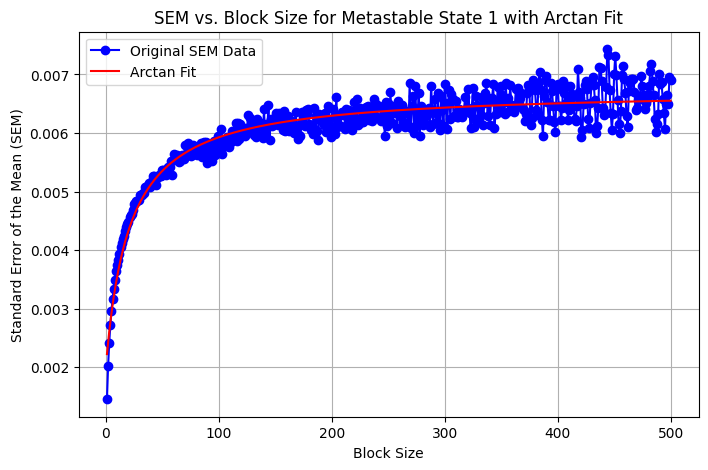

In [ ]:
from scipy.optimize import curve_fit

# Define the arctan function
def arctan_fit(x, a, b, c, d):
    return a * np.arctan(b * x + c) + d

# Convert block sizes and SEM values to numpy arrays
block_sizes = np.array(list(range(1, 501)))
sem_values = np.array(sem_results[0])  # First dataset's SEM

# Fit the arctan function to the SEM data
popt, _ = curve_fit(arctan_fit, block_sizes, sem_values, p0=[1, 0.1, 0, np.mean(sem_values)])

# Generate fitted values using the arctan function
fitted_sem = arctan_fit(block_sizes, *popt)

# Plot SEM vs. Block Size
plt.figure(figsize=(8, 5))
plt.plot(block_sizes, sem_results[0], marker="o", color="blue", label="Original SEM Data")
plt.plot(block_sizes, fitted_sem, color="red", linestyle="-", label="Arctan Fit")

# Labels and Title
plt.xlabel("Block Size")
plt.ylabel("Standard Error of the Mean (SEM)")
plt.title("SEM vs. Block Size for Metastable State 1 with Arctan Fit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
    for b in block_sizes:
        sem, blocked_avg,_ = block_averaging(states[1], b)
        sem_per_block_size.append(sem)
        blocked_avgs_per_block_size.append(blocked_avg)  # Store blocked averages

    sem_results.append(sem_per_block_size)

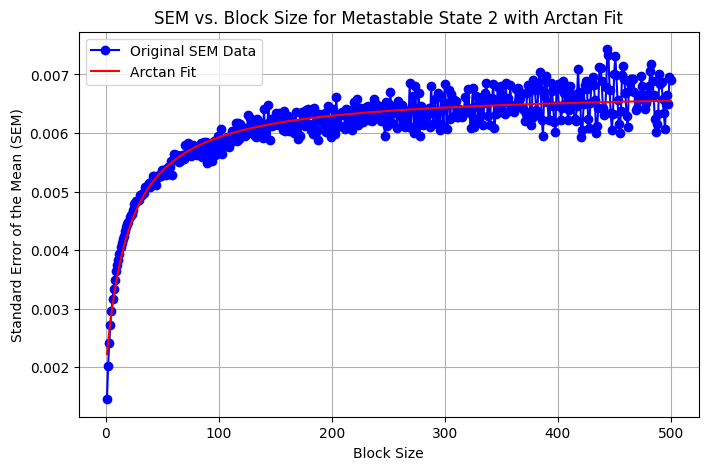

In [ ]:
from scipy.optimize import curve_fit

# Define the arctan function
def arctan_fit(x, a, b, c, d):
    return a * np.arctan(b * x + c) + d

# Convert block sizes and SEM values to numpy arrays
block_sizes = np.array(list(range(1, 501)))
sem_values = np.array(sem_results[0])  # First dataset's SEM

# Fit the arctan function to the SEM data
popt, _ = curve_fit(arctan_fit, block_sizes, sem_values, p0=[1, 0.1, 0, np.mean(sem_values)])

# Generate fitted values using the arctan function
fitted_sem = arctan_fit(block_sizes, *popt)

# Plot SEM vs. Block Size
plt.figure(figsize=(8, 5))
plt.plot(block_sizes, sem_results[0], marker="o", color="blue", label="Original SEM Data")
plt.plot(block_sizes, fitted_sem, color="red", linestyle="-", label="Arctan Fit")

# Labels and Title
plt.xlabel("Block Size")
plt.ylabel("Standard Error of the Mean (SEM)")
plt.title("SEM vs. Block Size for Metastable State 2 with Arctan Fit")
plt.legend()
plt.grid()
plt.show()

In [ ]:
block_average_metastable_states=[]
SEM_metastable_states=[]
std_vals=[]
block_size_1=400
block_size_2=400

#Get the block average of the metastable states

for states in metastable_states:
  sem_1,block_avg_1,_=block_averaging(states[0],block_size_1)
  sem_2,block_avg_2,_=block_averaging(states[1],80)
  block_average_metastable_states.append((block_avg_1,block_size_2))
  SEM_metastable_states.append((sem_1,sem_2))

print('Standard Error of the Mean of the Metastable States')
dataframe_metastates=pd.DataFrame(SEM_metastable_states)
dataframe_metastates.columns=['SEM_State1','SEM_State2']
dataframe_metastates.index=labels
dataframe_metastates

Standard Error of the Mean of the Metastable States


,SEM_State1,SEM_State2
dataset_2D-Model.9826,0.006837,0.014484
dataset_2D-Model.1695,0.005347,0.013128
dataset_2D-Model.1689,0.005242,0.013020


In [ ]:
from scipy.integrate import trapezoid
from sklearn.neighbors import KernelDensity

def mutual_information(x, y, p_x, p_y, p_xy):
    """
    Computes the mutual information I(X; Y) using 2D integration with the trapezoidal rule.

    Parameters:
    x (array): Grid points for X
    y (array): Grid points for Y
    p_x (array): Marginal probability distribution of X
    p_y (array): Marginal probability distribution of Y
    p_xy (2D array): Joint probability distribution of (X, Y)

    Returns:
    float: Mutual information I(X; Y)
    """
    px_py = np.outer(p_x, p_y)  # Compute P(X)P(Y) as outer product
    valid = (p_xy > 0) & (px_py > 0)  # Avoid log(0)
    integrand = np.zeros_like(p_xy)
    integrand[valid] = p_xy[valid] * np.log(p_xy[valid] / px_py[valid])

    mi = get_2d_integral_trapezoid(integrand,x,y)
    return mi

In [ ]:
import numpy as np
from scipy.integrate import trapezoid

def get_2d_integral_trapezoid(p_xy, x, y):
    """
    Approximates the integral of a 2D probability density function (PDF)
    using the Trapezoidal rule for better numerical accuracy.

    Parameters:
        p_xy (2D array): Evaluated probability density values on the grid.
        x (1D array): Grid values for x.
        y (1D array): Grid values for y.

    Returns:
        float: Approximated integral value.
    """

    integral = trapezoid(trapezoid(p_xy, y, axis=1), x, axis=0)  # Double trapezoidal integration
    return integral


In [ ]:
def estimate_distributions(data_x, data_y, grid_x, grid_y, bandwidth=0.5):
    """
    Estimates the marginal and joint probability distributions using Kernel Density Estimation (KDE).

    Parameters:
    data_x (array): Samples from X
    data_y (array): Samples from Y
    grid_x (array): Grid points for X
    grid_y (array): Grid points for Y
    bandwidth (float): Bandwidth for KDE

    Returns:
    tuple: (p_x, p_y, p_xy) - Estimated marginal and joint distributions
    """
    kde_x = KernelDensity(bandwidth=bandwidth).fit(data_x[:, None])
    kde_y = KernelDensity(bandwidth=bandwidth).fit(data_y[:, None])
    kde_xy = KernelDensity(bandwidth=bandwidth).fit(np.column_stack((data_x, data_y)))

    log_p_x = kde_x.score_samples(grid_x[:, None])
    log_p_y = kde_y.score_samples(grid_y[:, None])
    log_p_xy = kde_xy.score_samples(np.column_stack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2))

    p_x = np.exp(log_p_x)
    p_y = np.exp(log_p_y)
    p_xy = np.exp(log_p_xy).reshape(len(grid_x), len(grid_y))

    # Normalize distributions properly
    p_x /= trapezoid(p_x, grid_x)
    p_y /= trapezoid(p_y, grid_y)
    p_xy /= trapezoid(trapezoid(p_xy, grid_y, axis=1), grid_x, axis=0)

    # Ensure normalization
    assert np.isclose(trapezoid(p_x, grid_x), 1.0), "p_x is not normalized"
    assert np.isclose(trapezoid(p_y, grid_y), 1.0), "p_y is not normalized"
    assert np.isclose(trapezoid(trapezoid(p_xy, grid_y, axis=1), grid_x, axis=0), 1.0), "p_xy is not normalized"

    return p_x, p_y, p_xy

In [ ]:
def distance_function(mi,p_xy,grid_x,grid_y):
  integrand=p_xy*np.log2(p_xy)
  joint_entropy= (-1)*get_2d_integral_trapezoid(integrand,grid_x,grid_y)
  distance=1-(mi/joint_entropy)
  return distance

In [ ]:
grid_x = np.linspace(-3, 3, 100)
grid_y = np.linspace(-2.5, 2, 100)

Mutual Information and Distance Function for each dataset (Between x and y (or $p.x$ and $p.y$) for each dataset)

In [ ]:
mutual_information_values=[]
distance_function_values=[]
for (points_x,points_y) in zip(px,py):
  p_x,p_y,p_xy=estimate_distributions(points_x,points_y,grid_x,grid_y)
  mutual_information_values.append(mutual_information(grid_x,grid_y,p_x,p_y,p_xy))
  distance_function_values.append(distance_function(mutual_information_values[-1],p_xy,grid_x,grid_y))

mi_df=pd.DataFrame({'Mutual Information':mutual_information_values,
                    'Distance Values':distance_function_values})
mi_df.columns=['Mutual Information','Distance Function']
mi_df.index=labels
mi_df

,Mutual Information,Distance Function
dataset_2D-Model.9826,1.138023,0.703804
dataset_2D-Model.1695,1.182641,0.687271
dataset_2D-Model.1689,1.405452,0.622528


Using scikit-learn for re-checking the mutual information score

In [ ]:
from sklearn.metrics import normalized_mutual_info_score
mutual_information_values_sklearn=[]
for (points_x,points_y) in zip(px,py):
  mutual_information_values_sklearn.append(normalized_mutual_info_score(points_x,points_y))

mi_df_sklearn=pd.DataFrame({'Mutual Information':mutual_information_values_sklearn})
mi_df_sklearn.columns=['Mutual Information']
mi_df_sklearn.index=labels
mi_df_sklearn

,Mutual Information
dataset_2D-Model.9826,1.0
dataset_2D-Model.1695,1.0
dataset_2D-Model.1689,1.0


Based on the mutual information (MI) and the distance function (D), the p.x and p.y variables are quite correlated i.e. strongly dependent on each other since the $\mathrm{MI}>0$ and the $\mathrm{D}<1$ for all the datafiles.